Ensemble: when you combine multiple things

like multiple decision trees makes an ensemble for random forest

or you could make a model that does logistic regression, KNN, and Random Forest and use the results as a vote

# Random Forest
### aka, a lot of random trees

![forest](img/forest.jpeg)

## Outcomes

- differentiate between decision trees and random forest 
- explain what makes random forest so hella cool
- explore the fine-tuning options in `sklearn` for random forest
- build a random forest in `sklearn`


### Scenario: 
We've made a decision tree, but we are concerned it might not generalize well. What to do?


### Could use k-fold cross validation

![dectree](img/decisiontree.png)

### But with same data, might get same results
![same](img/sameresult.png)

### It's like crowd sourcing. 
Could ask a lot of **_similar_** people
![min](img/minions.gif)

Or could ask a more _**diverse**_ group of people
![waldo](img/waldo.gif)

### Want to create a more diverse set of trees

![forest](img/randomforest.png)

### How do you diversify?

You create $m$ trees that randomly sample from the your data.<br>
Then at each node, $p$ features are randomly chosen to be considered when splitting.

![mind](img/mindblown.gif)

### Specifics:

 $m$ trees defaults to 100 unless otherwise specified.<br>
 $p$ features defaults to square root of total features.

### Bagging

This technique is called _bagging_ because the samples are **_bootstrapped_** and then the results of each tree are **_aggregated_**

![bag](img/bag.jpeg)

### Built in cross-validation

Because each tree is made on a **sample**, the algorithm also calculates the **Out of Bag**(OOB) Error averaged for each tree. 

In [1]:
!pip install pydotplus

     |████████████████████████████████| 286kB 2.2MB/s eta 0:00:01
  Stored in directory: /Users/maxtingle/Library/Caches/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [62]:
# libraries for decision trees
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pandas as pd 
import numpy as np
%matplotlib inline

In [3]:
# New ones for random forest

np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

## Scenario: Pima Indians diabetes dataset

<img src="img/0_IunJJNPI_F6U8ii9.jpeg" style="height:200px">


<br>

> This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
- [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

>The Pima Indians of the Gila River Indian Community have participated in longitudinal studies of the etiology of diabetes since 1965 (20).
- [Genetic Studies of the Etiology of Type 2 Diabetes in Pima Indians](https://diabetes.diabetesjournals.org/content/53/5/1181)

In [4]:
diabetes = pd.read_csv('diabetes.csv')

In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


the zeros in the minimum column above will mess up the model

no one has a 0 BMI or 0 Blood pressure

clean data after the split - bc of data leekage

## Do we need to clean the data?

In [19]:
X = diabetes.drop(columns=['Outcome'])
Y = diabetes['Outcome']

In [20]:
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state= 10)  

In [22]:
# take out 0's first
X_train[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = X_train[['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [34]:
# take out 0's first
X_test[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = X_test[['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [23]:
# see where the NAs are
X_train.isnull().sum() 

Pregnancies                   0
Glucose                       4
BloodPressure                30
SkinThickness               174
Insulin                     297
BMI                           9
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [24]:
# Replace nans with means and medians
X_train['Glucose'] = X_train['Glucose'].fillna(X_train['Glucose'].mean())
X_train['BloodPressure'] = X_train['BloodPressure'].fillna(X_train['BloodPressure'].mean())
X_train['SkinThickness'] = X_train['SkinThickness'].fillna(X_train['SkinThickness'].median())
X_train['Insulin'] = X_train['Insulin'].fillna(X_train['Insulin'].median())
X_train['BMI'] = X_train['BMI'].fillna(X_train['BMI'].median())

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [35]:
# Replace nans with means and medians
X_test['Glucose'] = X_test['Glucose'].fillna(X_test['Glucose'].mean())
X_test['BloodPressure'] = X_test['BloodPressure'].fillna(X_test['BloodPressure'].mean())
X_test['SkinThickness'] = X_test['SkinThickness'].fillna(X_test['SkinThickness'].median())
X_test['Insulin'] = X_test['Insulin'].fillna(X_test['Insulin'].median())
X_test['BMI'] = X_test['BMI'].fillna(X_test['BMI'].median())

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [25]:
X_train.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [27]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,614.0,3.835505,3.388491,0.000,1.0000,3.000000,6.00,17.00
Glucose,614.0,122.165574,31.179800,44.000,99.0000,117.500000,142.75,199.00
BloodPressure,614.0,72.666096,12.162433,24.000,64.0000,72.666096,80.00,122.00
SkinThickness,614.0,28.985342,8.853426,7.000,25.0000,29.000000,32.00,99.00
Insulin,614.0,139.627036,92.216212,14.000,119.2500,120.000000,125.00,846.00
BMI,614.0,32.270033,6.824601,18.200,27.5000,32.000000,36.30,67.10
DiabetesPedigreeFunction,614.0,0.462686,0.326784,0.078,0.2415,0.365500,0.60,2.42
Age,614.0,33.208469,11.761865,21.000,24.0000,29.000000,41.00,81.00


In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [28]:
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [29]:
y_pred = classifier.predict(X_test)

In [30]:
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :71.42857142857143

AUC is :0.67

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,82,13,95
1,31,28,59
All,113,41,154


In [33]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,154.0,3.883117,3.303688,0.000,1.0000,3.0000,5.75000,14.000
Glucose,154.0,119.000000,28.937390,0.000,100.0000,116.0000,136.00000,189.000
BloodPressure,154.0,69.064935,17.340374,0.000,62.0000,70.0000,78.00000,110.000
SkinThickness,154.0,19.616883,16.618046,0.000,0.0000,22.0000,32.00000,60.000
Insulin,154.0,72.694805,94.177716,0.000,0.0000,11.5000,135.00000,480.000
BMI,154.0,32.756494,7.993976,0.000,27.3750,32.6000,37.50000,52.900
DiabetesPedigreeFunction,154.0,0.508519,0.347545,0.088,0.2475,0.3985,0.68525,1.893
Age,154.0,33.370130,11.791185,21.000,24.0000,30.0000,38.00000,69.000


In [36]:
X_train.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [37]:
# Train a DT classifier
classifier2 = DecisionTreeClassifier(random_state=10, criterion='entropy')  
classifier2.fit(X_train, y_train)  

# Make predictions for test data
y_pred = classifier2.predict(X_test) 

# Calculate Accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

Accuracy is :70.77922077922078

AUC is :0.68

Confusion Matrix
----------------
Predicted    0   1  All
True                   
0           77  18   95
1           27  32   59
All        104  50  154


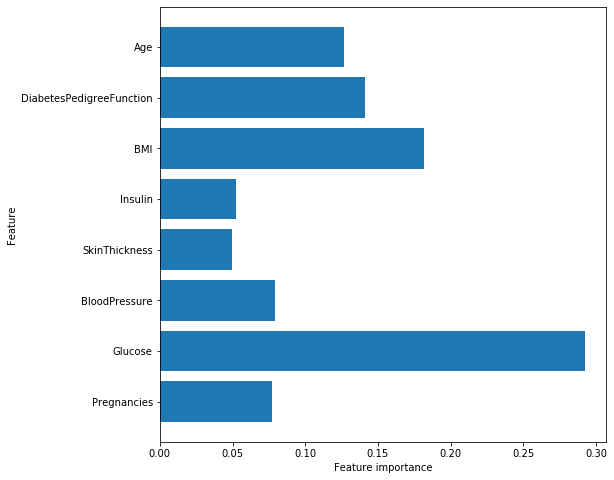

In [38]:
classifier2.feature_importances_
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(classifier2)

In [39]:
pred = classifier2.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[77 18]
 [27 32]]
              precision    recall  f1-score   support

           0       0.74      0.81      0.77        95
           1       0.64      0.54      0.59        59

    accuracy                           0.71       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.70      0.71      0.70       154



## Random forest in code

`n_estimators` = $m$<br>
`max_features` = $p$

In [40]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5) # n_estimators is number of trees, max_depth is number of branches
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Get accuracy of training data

In [41]:

forest.score(X_train, y_train)

0.8501628664495114

#### Get accuracy of test data

In [42]:
forest.score(X_test, y_test)

0.7402597402597403

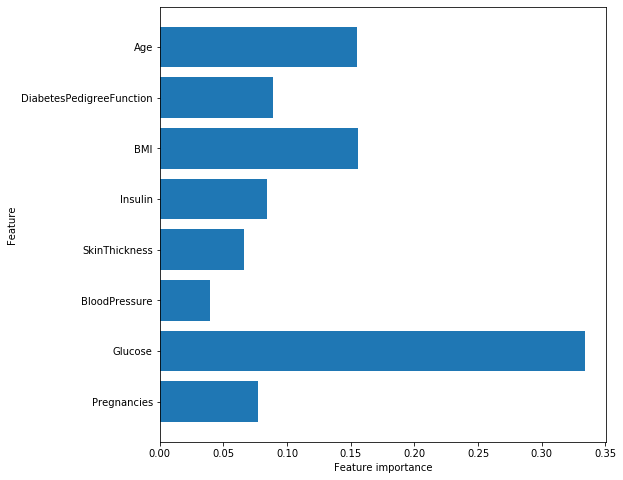

In [43]:
plot_feature_importances(forest)

### Let us try to fine tune this model a bit

In [44]:
forest_2 = RandomForestClassifier(n_estimators = 10, max_features= 2, max_depth= 2)
forest_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
forest_2.score(X_train, y_train)

0.7785016286644951

In [46]:
forest_2.score(X_test, y_test)

0.7272727272727273

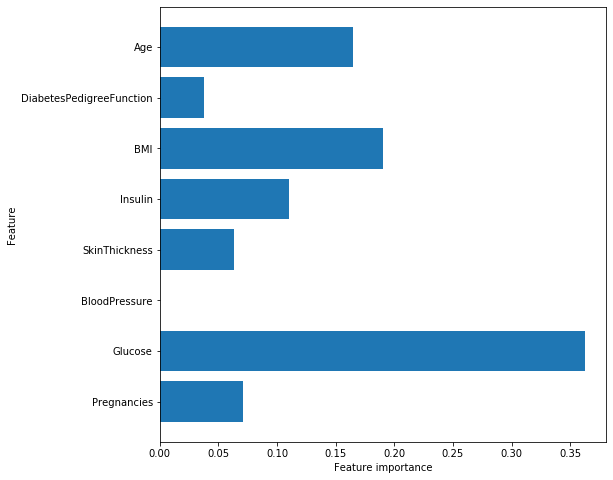

In [48]:
plot_feature_importances(forest_2)

In [50]:
forest_3 = RandomForestClassifier(n_estimators = 100, max_features= 4, max_depth= 10)
forest_3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
forest_3.score(X_train, y_train)

0.990228013029316

In [52]:
forest_3.score(X_test, y_test)

0.7142857142857143

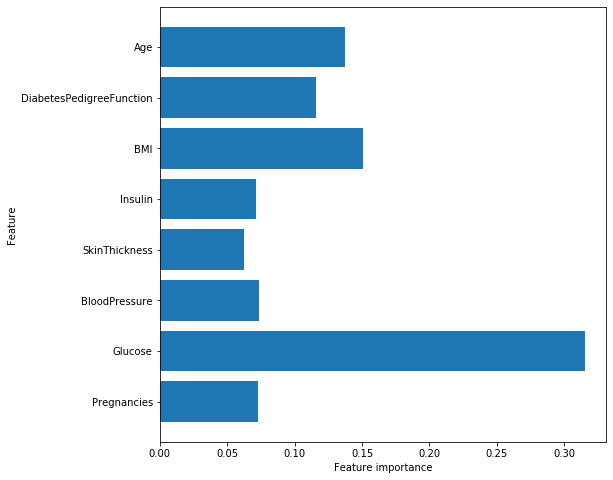

In [53]:
plot_feature_importances(forest_3)

### Hyper-parameters for decision trees

`n_estimators` : the number of trees in the forest<br>
`criterion`: “gini”,”entropy” <br>
`max_features`: the number of random features to be considered when looking for the best split <br>
`max_depth`:  the maximum number of levels of a tree<br>
`bootstrap`: whether or not bootstrap samples are used to build trees <br>
`oob_score`: whether or not to use out-of-bag samples to estimate the generalization accuracy<br>
`n_jobs`: how many cores you want to use when training your trees<br>


In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [30, 100, 300],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [2, 4, 6]
}

In [57]:
gs = GridSearchCV(forest, param_grid, cv=5)
gs.fit(X_test, y_test)
gs.best_params_

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100}

In [58]:
gs.score(X_train, y_train)

0.741042345276873

In [59]:
gs.score(X_test, y_test)

0.9285714285714286

**you can ask for a list of scores you want**


**randomized search cv for less expensive computation**

### Benefits
**Strong performance**: The Random Forest algorithm usually has very strong performance on most problems, when compared with other classification algorithms. Because this is an ensemble algorithm, the model is naturally resistant to noise and variance in the data, and generally tends to perform quite well.

**Interpretability**: Conveniently, since each tree in the Random Forest is a Glass-Box Model (meaning that the model is interpretable, allowing us to see how it arrived at a certain decision), the overall Random Forest is, as well! You'll demonstrate this yourself in the upcoming lab, by inspecting feature importances for both individual trees and the entire Random Forest itself.

### Drawbacks
**Computational Complexity**: Like any ensemble method, training multiple models means paying the computational cost of training each model. On large datasets, the runtime can be quite slow compared to other algorithms.

**Memory Usage**: Another side effect of the ensembled nature of this algorithm, having multiple models means storing each in memory. Random Forests tend to have a larger memory footprint that other models. Whereas a parametric model like a Logistic Regression just needs to store each of the coefficients, a Random Forest has to remember every aspect of every tree! It's not uncommon to see larger Random Forests that were trained on large datasets have memory footprints in the 10s, or even hundreds of MB. For data scientists working on modern computers, this isn't typically a problem--however, there are special cases where the memory footprint can make this an untenable choice--for instance, an app on a smartphone that uses machine learning may not be able to afford to spend that much disk space on a Random Forest model!

### Questions to consider

How do Random Forests handle the bias-variance tradeoff? <br>
What would be another way of using ensembling methods to tackle the bias-variance tradeoff?

Additional Resources<br>
https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf<br>
https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm


Another flatiron slidedeck [here](https://docs.google.com/presentation/d/1bUwvdvg4bDRVzE3YaLSQZcsx-7t2ZFnaEGxjQHjxAoc/edit?usp=sharing)